# **Thailand Tourism Data Analysis**

<a id="table-of-contents"></a>

# Table of Contents

1. [Introduction](#1-introduction)
    - [Data Source](#data-source)
    - [Dataset Overview](#dataset-overview)
2. [Data Loading and Preprocessing](#2-data-loading-and-preprocessing)
    - [Import Libraries](#import-libraries)
    - [Load the Data](#load-the-data)
    - [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
    - [Demographic, Socioeconomic and Geographic Enrichment](#demographic-socioeconomic-and-geographic-enrichment)
3. [Tourism Outlook](#3-tourism-outlook)
    - [Trend of Number of Tourists Per Year](#trend-of-number-of-tourists-per-year)
    - [Tourist by Region](#tourist-by-region)
    - [Tourist by Subregion](#tourist-by-subregion)
    - [Tourist by Country](#tourist-by-country)
    - [Relative Tourism Interest](#relative-tourism-interest)
4. [Geographical Distribution of Tourists](#4-geographical-distribution-of-tourists)
5. [Seasonal Traffic](#5-seasonal-traffic)
    - [Number of Tourists by Month](#number-of-tourists-by-month)
    - [Number of Tourists by Season](#number-of-tourists-by-season)
6. [Tourist Spending](#6-tourist-spending)
    - [Spending by Region](#spending-by-region)
    - [Spending by Subregion](#spending-by-subregion)
    - [Spending by Month & Season](#spending-by-month-and-season)
7. [Tourist Profile](#7-tourist-profile)
    - [Spending per person by Continent](#spending-per-person-by-continent)
    - [Spending per person by Subregion](#spending-per-person-by-subregion)
    - [Spending per person by Country](#spending-per-person-by-country)
8. [Category-wise Spending by Country](#8-category-wise-spending-by-country)
    - [Accommodation](#accommodation)
    - [Shopping](#shopping)
    - [Food](#food)
    - [Entertainment](#entertainment)
    - [Local Transport](#local-transport)
9. [Distribution of Total Spending per Category](#9-distribution-of-total-spending-per-category)
10. [Latest Year (2023)](#10-latest-year-2023)
    - [2023 Tourist Spending](#2023-tourist-spending)
    - [2023 Tourist Profile](#2023-tourist-profile)
    - [2023 Category-wise Spending by Country](#2023-category-wise-spending-by-country)
    - [2023 Distribution of Total Spending per Category](#2023-distribution-of-total-spending-per-category)
11. [Conclusions](#11-conclusions)


<a id="1-introduction"></a>

# 1. Introduction

[Table of Contents](#table-of-contents)

This Jupyter Notebook is part of the project 'Thailand Tourism Dashboard'. 
It focuses on the exploratory data analysis (EDA) of tourism data in Thailand, 
covering the period from January 2015 to July 2023.

## Objective
- To understand tourism trends in Thailand.
- To analyze spending patterns of tourists.
- To prepare data for building an interactive dashboard.

<a id="data-source"></a>

## Data Source
The dataset is sourced from the [Thailand Tourism Trend](https://data.go.th/en/dataset/trend_inbound_tourists) dataset, provided by the Ministry of Tourism and Sports, Thailand.

- Data Key: 445c66d8-a06a-49d9-adfc-35faca6fc785
- Tags: จำนวนนักท่องเที่ยวชาวต่างชาติ, สถิตินักท่องเที่ยวชาวต่างชาติ
- Visibility: Public
- Dataset Create Date: November 12, 2023
- Maintain Date: December 12, 2023
- Data Type: Statistical data
- Contact Person: กองเศรษฐกิจการท่องเที่ยวและกีฬา
- Contact Email: ets.mots@gmail.com
- Objective: เพื่อการให้บริการประชาชน, พันธกิจหน่วยงาน, ดัชนี/ตัวชี้วัดระดับนานาชาติ
- Update Frequency: Monthly
- Geo Coverage: Thailand
- Data Source: Office of the Permanent Secretary, Ministry of Tourism and Sports
- Data Format: Database, JSON
- Data Category: ข้อมูลสาธารณะ
- License: Open Data Common

<a id="dataset-overview"></a>

## Dataset Overview

<img src="er-diagram.png" alt="ER Diagram" width="600"/>

`trend-inbound-tourists.json` which we will import as `df` and change all spending into THB

| Column Name      | Description                                                       | Data Type    |
|------------------|-------------------------------------------------------------------|--------------|
| `YearInfo`       | The year of the record.                                           | `int`        |
| `MonthInfo`      | The month of the record.                                          | `int`        |
| `DayInfo`        | The day of the record.                                            | `int`        |
| `CountryID`      | A unique identifier for the country. (ISO 3166-1 numeric code)    | `str`        |
| `ISO`            | The 3-letter code for the country. (ISO 3166-1 alpha-3 code)      | `str`        |
| `CountryName`    | The name of the country.                                          | `str`        |
| `Status`         | The status of the data (Provisional or Finalized).                | `str`        |
| `TouristNumber`  | The number of tourists from that country on that date.            | `float`      |
| `Receipt`        | Total spending (in Million THB).                                  | `float`      |
| `Shopping`       | Spending on shopping (in Million THB).                            | `float`      |
| `Entertainment`  | Spending on entertainment (in Million THB).                       | `float`      |
| `Sightseeing`    | Spending on sightseeing (in Million THB).                         | `float`      |
| `Accommodation`  | Spending on accommodation (in Million THB).                       | `float`      |
| `Food`           | Spending on food (in Million THB).                                | `float`      |
| `LocalTransport` | Spending on local transport (in Million THB).                     | `float`      |
| `Miscellaneous`  | Spending on miscellaneous items (in Million THB).                 | `float`      |


We will later create the new dataframe name `profile`

| Column Name      | Description                                                       | Data Type    |
|------------------|-------------------------------------------------------------------|--------------|
| `ISO`            | The 3-letter code for the country. (ISO 3166-1 alpha-3 code)      | `str`        |
| `Continent`      | The continent where that country is located.                      | `str`        |
| `SubRegion`      | The sub-region classification within the continent of that country.| `str`        |
| `SubUnit`        | The name of the country which extract from Subunit column.        | `str`        |
| `Population`     | The estimated total population from that country in 2019.         | `int`        |
| `IncomeGroup`    | The income group classification from that country.                | `str`        |

<a id="2-data-loading-and-preprocessing"></a>

# 2. Data Loading and Preprocessing

[Table of Contents](#table-of-contents)

<a id="import-libraries"></a>

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd
from prettytable import PrettyTable

<a id="load-the-Data"></a>

## Load the Data

In [2]:
# Load the JSON data from the uploaded file
file_path = 'trend-inbound-tourists.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the data to a DataFrame
df = pd.json_normalize(data)

# Displaying the first few rows of the DataFrame
df.head()

,YearInfo,MonthInfo,DayInfo,CountryID,ISO,CountryName,Status,TouristNumber,Receipt,Shopping,Entertainment,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous
0,2015,1,1,004,AFG,Afghanistan,F,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,008,ALB,Albania,F,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,012,DZA,Algeria,F,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,016,ASM,American Samoa,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,020,AND,Andorra,F,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Multiplying the expenses and receipt columns by 1,000,000 to represent THB
expense_and_receipt_columns = ['Receipt', 'Shopping', 'Entertainment', 'Sightseeing', 'Accommodation', 'Food', 'LocalTransport', 'Miscellaneous']
df[expense_and_receipt_columns] = df[expense_and_receipt_columns].multiply(1000000)

In [4]:
# Export to CSV
#df.to_csv('df.csv', index=False)

<a id="data-cleaning-and-preprocessing"></a>

## Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearInfo        19012 non-null  int64  
 1   MonthInfo       19012 non-null  int64  
 2   DayInfo         19012 non-null  int64  
 3   CountryID       19012 non-null  object 
 4   ISO             19012 non-null  object 
 5   CountryName     19012 non-null  object 
 6   Status          19012 non-null  object 
 7   TouristNumber   12227 non-null  float64
 8   Receipt         1872 non-null   float64
 9   Shopping        1080 non-null   float64
 10  Entertainment   1080 non-null   float64
 11  Sightseeing     1080 non-null   float64
 12  Accommodation   1080 non-null   float64
 13  Food            1080 non-null   float64
 14  LocalTransport  1080 non-null   float64
 15  Miscellaneous   1080 non-null   float64
dtypes: float64(9), int64(3), object(4)
memory usage: 2.3+ MB


In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

YearInfo              0
MonthInfo             0
DayInfo               0
CountryID             0
ISO                   0
CountryName           0
Status                0
TouristNumber      6785
Receipt           17140
Shopping          17932
Entertainment     17932
Sightseeing       17932
Accommodation     17932
Food              17932
LocalTransport    17932
Miscellaneous     17932
dtype: int64

<a id="demographic-socioeconomic-and-geographic-enrichment"></a>

## Demographic, Socioeconomic and Geographic Enrichment

### Join using world_data from Natural Earth
`world_data.csv` are extracted from [Natural Earth](https://www.naturalearthdata.com/)

In [7]:
# Load the world_data.csv to examine all A3 columns and determine the best one for matching
world_data = pd.read_csv("world_data.csv")

# Identifying all columns that contain 'A3' in their name
a3_columns = [col for col in world_data.columns if 'A3' in col]

# Displaying the unique values in each of the A3 columns to determine which one matches the most with the ISO codes in the tourism dataset
a3_unique_values = {col: world_data[col].unique() for col in a3_columns}
a3_unique_values.keys()


dict_keys(['SOV_A3', 'ADM0_A3', 'GU_A3', 'SU_A3', 'BRK_A3', 'ISO_A3', 'ISO_A3_EH', 'UN_A3', 'WB_A3', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'ADM0_A3_ID', 'ADM0_A3_PL', 'ADM0_A3_GR', 'ADM0_A3_IT', 'ADM0_A3_NL', 'ADM0_A3_SE', 'ADM0_A3_BD', 'ADM0_A3_UA', 'ADM0_A3_UN', 'ADM0_A3_WB'])

In [8]:
# Extracting unique ISO codes from the tourism dataset
tourism_iso_codes = df['ISO'].unique()

# Function to calculate match rate for each A3 column
def calculate_match_rate(column):
    world_iso_codes = world_data[column].unique()
    matched_codes = set(tourism_iso_codes).intersection(set(world_iso_codes))
    match_rate = len(matched_codes) / len(tourism_iso_codes)
    return match_rate

# Calculating match rate for each A3 column
match_rates = {col: calculate_match_rate(col) for col in a3_columns}
match_rates_sorted = sorted(match_rates.items(), key=lambda x: x[1], reverse=True)
top_5_match_rates = match_rates_sorted[:5]

top_5_match_rates

[('ISO_A3_EH', 0.9471544715447154),
 ('ADM0_A3', 0.9390243902439024),
 ('GU_A3', 0.9390243902439024),
 ('ISO_A3', 0.9390243902439024),
 ('ADM0_A3_US', 0.9390243902439024)]

Based on the match rates calculated for each `A3` column in the world_data.csv file, the column `ISO_A3_EH` has the highest match rate with the ISO codes in our tourism dataset (approximately 94.72%). Other columns such as ADM0_A3, GU_A3, ISO_A3, and various specific country columns (ADM0_A3_US, ADM0_A3_FR, etc.) also show similar high match rates.

### Join using ISO-3166 code
`all.csv` is from Luke Duncalfe github [ISO-3166-Countries-with-Regional-Codes](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

In [9]:
# Load the all.csv to examine alpha-3 column and determine if it is better for matching
all_data = pd.read_csv("all.csv")

# Extracting the relevant columns for comparison (ISO to alpha-3 and CountryID to country-code)
alpha_3_column = all_data['alpha-3']

# Extracting unique ISO and CountryID codes from the tourism dataset
unique_iso_codes = df['ISO'].unique()

# Function to calculate match rate
def calculate_match_rate(tourism_codes, all_codes):
    matched_codes = set(tourism_codes).intersection(set(all_codes))
    match_rate = len(matched_codes) / len(tourism_codes)
    return match_rate

# Calculating match rates
match_rate_iso_alpha3 = calculate_match_rate(unique_iso_codes, alpha_3_column)

match_rate_iso_alpha3

0.9878048780487805

The match rate between the ISO codes in our tourism dataset and the `alpha-3` column in the `all.csv` file is approximately 98.78%. This indicates a very high level of matching between these two sets of codes, making the Alpha-3 column from all.csv a better candidate for joining with the ISO codes in our dataset.

### `profile` dataset

In [10]:
# Creating a new dataframe with only 'ISO' from 'df'
profile = df[['ISO']].drop_duplicates()

# Renaming columns in 'all_df' and 'world_data' for clarity and easier joins
all_data_renamed = all_data.rename(columns={'alpha-3': 'ISO', 'region': 'Continent', 'sub-region': 'SubRegion'})
world_data_renamed = world_data.rename(columns={'ISO_A3_EH': 'ISO', 'SUBUNIT': 'SubUnit', 'POP_EST': 'Population', 'INCOME_GRP': 'IncomeGroup'})

# Joining 'df_ISO' with 'new_df_iso_only'
profile = profile.merge(all_data_renamed[['ISO', 'Continent', 'SubRegion']], on='ISO', how='left')

# Joining 'world_data_renamed' with 'new_df_iso_only'
profile = profile.merge(world_data_renamed[['ISO', 'SubUnit', 'Population', 'IncomeGroup']], on='ISO', how='left')

In [11]:
# Check duplicates
profile.duplicated(subset=['ISO']).sum()

6

In [12]:
# Removing duplicates from the profile dataframe
profile = profile.drop_duplicates(subset=['ISO'])

In [13]:
# Displaying the first few rows of the merged dataframe
profile.head()

,ISO,Continent,SubRegion,SubUnit,Population,IncomeGroup
0,AFG,Asia,Southern Asia,Afghanistan,38041754.0,5. Low income
1,ALB,Europe,Southern Europe,Albania,2854191.0,4. Lower middle income
2,DZA,Africa,Northern Africa,Algeria,43053054.0,3. Upper middle income
3,ASM,Oceania,Polynesia,American Samoa,55312.0,3. Upper middle income
4,AND,Europe,Southern Europe,Andorra,77142.0,2. High income: nonOECD


In [14]:
# Export to CSV
#profile.to_csv('profile.csv', index=False)

## JOIN

In [15]:
# Set 'ISO' as the index for both dataframes for efficient joining
df.set_index('ISO', inplace=True)
profile.set_index('ISO', inplace=True)

# Join the dataframes on the index (specifying suffixes for overlapping column names during the join)
df_joined = df.join(profile, how='left',  rsuffix='_profile')

# Reset the index so that ISO becomes a column again, for further analysis
df_joined.reset_index(inplace=True)

## MERGE

In [14]:
# Merge the main dataframe with the profile to get the region, poplation and incomegroup data for further dashboard use
#df_merged = df.merge(profile[['ISO', 'Continent', 'SubRegion', 'SubUnit', 'Population', 'IncomeGroup']], on='ISO', how='left')

In [17]:
# Export to CSV
#df_merged.to_csv('trend-inbound-tourists-merged.csv', index=False)

In [15]:
#df_merged['TouristNumber'].sum()

209674418.0

<a id="3-tourism-outlook"></a>

# 3. Tourism Outlook

[Table of Contents](#table-of-contents)

In [14]:
df_joined.head()

,ISO,YearInfo,MonthInfo,DayInfo,CountryID,CountryName,Status,TouristNumber,Receipt,Shopping,...,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous,Continent,SubRegion,CountryName_profile,Population,IncomeGroup
0,,2019,1,1,,East Europe,P,100661.0,5.422460e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019,1,1,,Others in America,P,8319.0,4.598600e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,2019,1,1,,Others in Ociania,P,320.0,3.530000e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,2019,1,1,,Others in Africa,P,7387.0,5.690600e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,2019,1,1,,Others in East Asia,P,8883.0,6.063200e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_joined.describe()

,YearInfo,MonthInfo,DayInfo,TouristNumber,Receipt,Shopping,Entertainment,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous,Population
count,19835.000000,19835.000000,19835.000000,1.276000e+04,2.067000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.684300e+04
mean,2017.726544,6.740408,3.099521,1.779781e+04,3.062397e+09,7.817813e+08,3.669375e+08,1.303607e+08,9.687054e+08,6.998981e+08,3.293589e+08,5.429130e+07,5.595752e+07
std,2.122292,3.257297,5.859896,6.682410e+04,6.097262e+09,1.889758e+09,5.836411e+08,3.283828e+08,1.638858e+09,1.237069e+09,5.783247e+08,1.145975e+08,1.901175e+08
min,2015.000000,1.000000,1.000000,1.000000e+00,5.200000e+05,1.226000e+07,2.720000e+06,8.200000e+05,1.039000e+07,6.460000e+06,2.940000e+06,3.400000e+05,0.000000e+00
25%,2016.000000,4.000000,1.000000,4.100000e+01,4.759100e+08,1.147350e+08,6.203750e+07,1.625250e+07,1.684050e+08,1.185625e+08,6.268750e+07,6.245000e+06,6.221370e+05
50%,2017.000000,7.000000,1.000000,4.540000e+02,1.289410e+09,3.477450e+08,1.665050e+08,4.659000e+07,4.645800e+08,3.213100e+08,1.675150e+08,1.946500e+07,8.574832e+06
75%,2020.000000,9.000000,1.000000,7.172000e+03,3.943190e+09,8.329150e+08,5.480425e+08,1.516650e+08,1.336418e+09,9.763700e+08,4.526425e+08,7.193250e+07,3.647177e+07
max,2023.000000,12.000000,31.000000,1.198971e+06,5.923560e+10,1.836228e+10,4.995970e+09,3.631330e+09,1.440529e+10,1.157340e+10,5.293890e+09,1.110490e+09,1.397715e+09


<a id="trend-of-number-of-tourists-per-year"></a>

## Trend of Number of Tourists Per Year

In [16]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

<Figure size 1500x600 with 0 Axes>

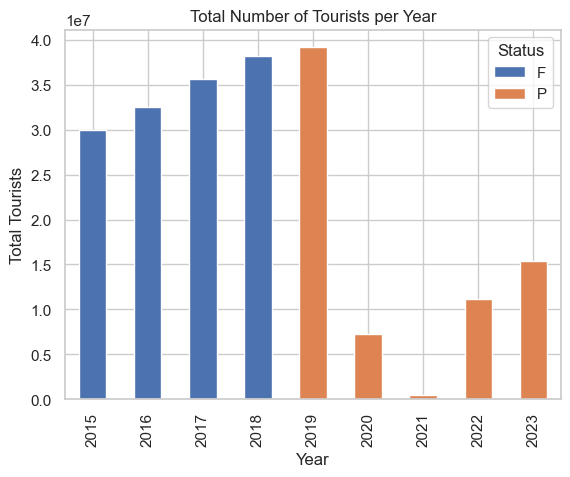

In [17]:
# Trend Analysis: Tourist numbers over the years (Assuming 'P' is Provisional and 'F' is Finalized)
status_comparison = df.groupby(['YearInfo', 'Status'])['TouristNumber'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 6))
status_comparison.plot(kind='bar', stacked=True)
plt.title('Total Number of Tourists per Year')
plt.ylabel('Total Tourists')
plt.xlabel('Year')
plt.legend(title='Status')
plt.show()

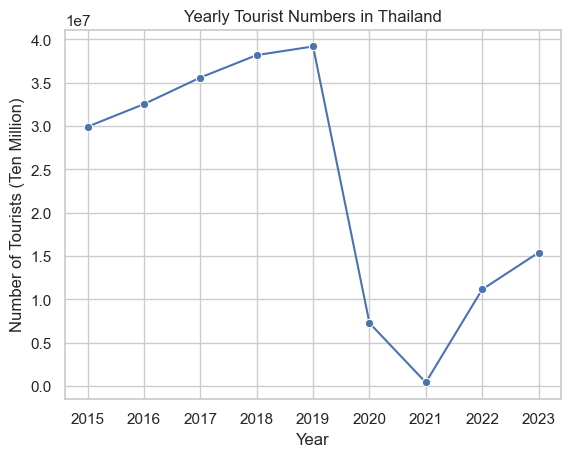

In [18]:
# Grouping data by year and month to see the overall tourist trend
yearly_tourist_data = df.groupby(['YearInfo']).agg({'TouristNumber': 'sum'}).reset_index()
monthly_tourist_data = df.groupby(['YearInfo', 'MonthInfo']).agg({'TouristNumber': 'sum'}).reset_index()

# Plotting yearly tourist numbers
sns.lineplot(data=yearly_tourist_data, x='YearInfo', y='TouristNumber', marker='o')
plt.title('Yearly Tourist Numbers in Thailand')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (Ten Million)')
plt.grid(True)
plt.show()

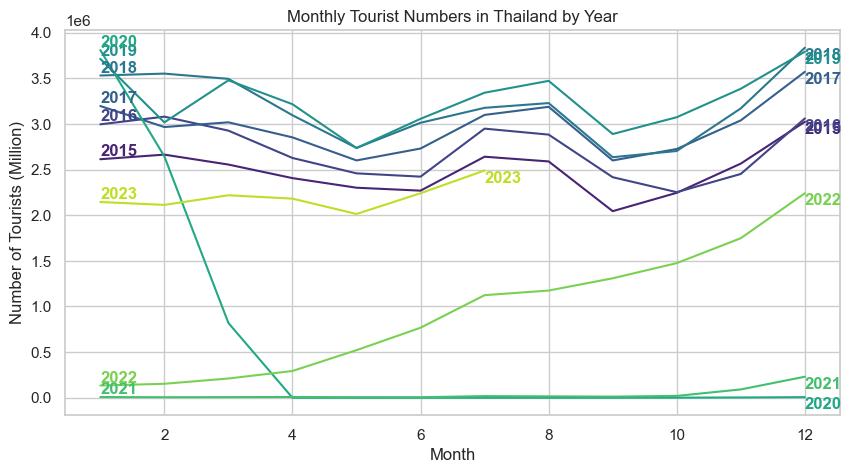

In [19]:
# Plotting monthly tourist numbers
all_years = sorted(monthly_tourist_data['YearInfo'].unique())

# Define a color palette with as many colors as there are years
palette = sns.color_palette("viridis", len(all_years))

plt.figure(figsize=(10, 5))

# Plotting each year separately and adding annotations at the start and end of each line
for i, year in enumerate(all_years):
    year_data = monthly_tourist_data[monthly_tourist_data['YearInfo'] == year]
    line = sns.lineplot(x=year_data['MonthInfo'], y=year_data['TouristNumber'], color=palette[i])
    # Annotating the first point of each line
    plt.text(year_data['MonthInfo'].iloc[0], year_data['TouristNumber'].iloc[0], str(year), color=palette[i], weight='bold', verticalalignment='bottom')
    # Annotating the last point of each line
    plt.text(year_data['MonthInfo'].iloc[-1], year_data['TouristNumber'].iloc[-1], str(year), color=palette[i], weight='bold', verticalalignment='top')

plt.title('Monthly Tourist Numbers in Thailand by Year')
plt.xlabel('Month')
plt.ylabel('Number of Tourists (Million)')
plt.grid(True)
plt.show()

<a id="tourist-by-region"></a>

## Tourist by Region

In [33]:
# Aggregate tourist numbers by region
tourists_by_region = df_joined.groupby('Continent')['TouristNumber'].sum().reset_index()

# Aggregate tourist numbers by subregion
tourists_by_subregion = df_joined.groupby('SubRegion')['TouristNumber'].sum().reset_index()

# Aggregate tourist numbers by country
tourists_by_country = df_joined.groupby('CountryName_profile')['TouristNumber'].sum().reset_index()

# Sort the data for better visualization
tourists_by_region_sorted = tourists_by_region.sort_values(by='TouristNumber', ascending=False)
tourists_by_subregion_sorted = tourists_by_subregion.sort_values(by='TouristNumber', ascending=False)
tourists_by_country_sorted = tourists_by_country.sort_values(by='TouristNumber', ascending=False)

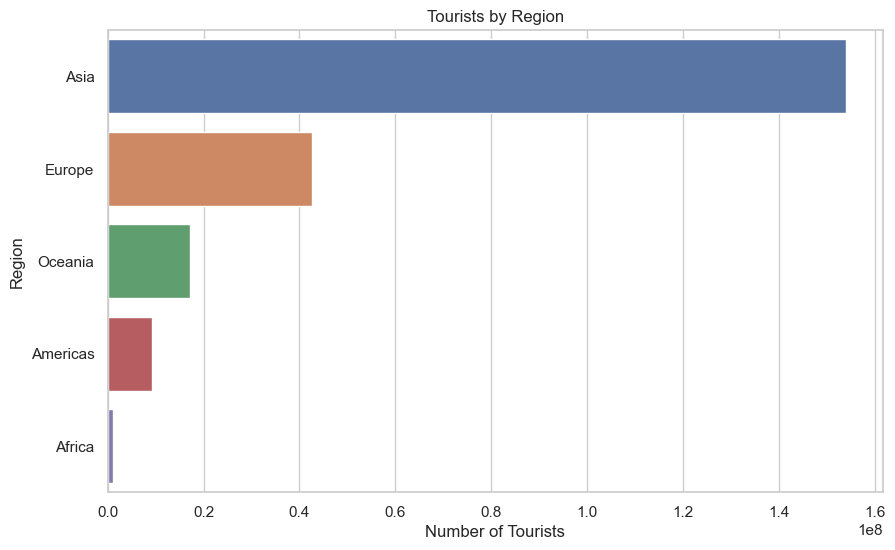

In [34]:
# Visualizing Tourists by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='TouristNumber', y='Continent', data=tourists_by_region_sorted)
plt.title('Tourists by Region')
plt.xlabel('Number of Tourists')
plt.ylabel('Region')
plt.show()

<a id="tourist-by-subregion"></a>

## Tourist by Subregion

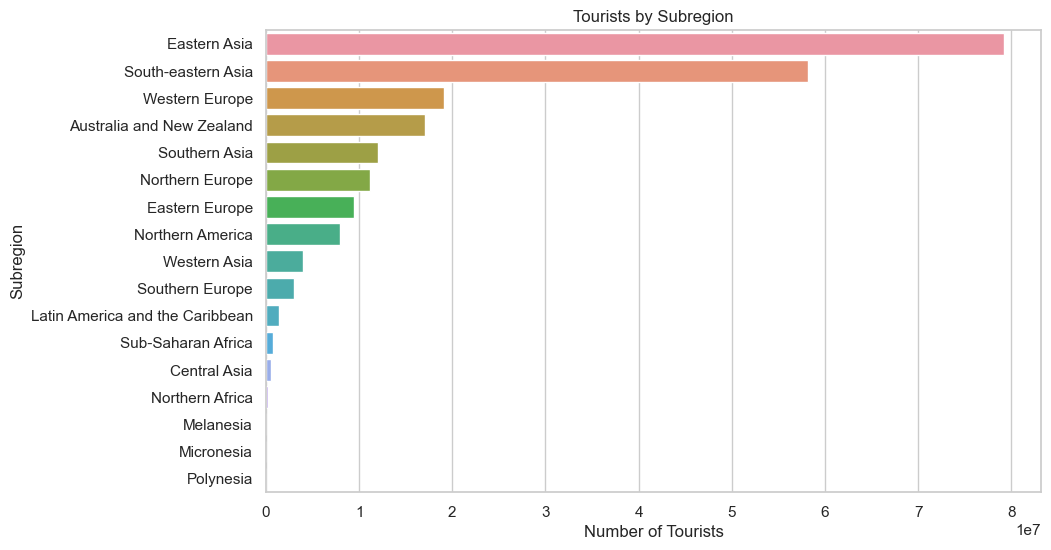

In [36]:
# Visualizing Tourists by Subregion
plt.figure(figsize=(10, 6))
sns.barplot(x='TouristNumber', y='SubRegion', data=tourists_by_subregion_sorted)
plt.title('Tourists by Subregion')
plt.xlabel('Number of Tourists')
plt.ylabel('Subregion')
plt.show()

<a id="tourist-by-country"></a>

## Tourist by Country

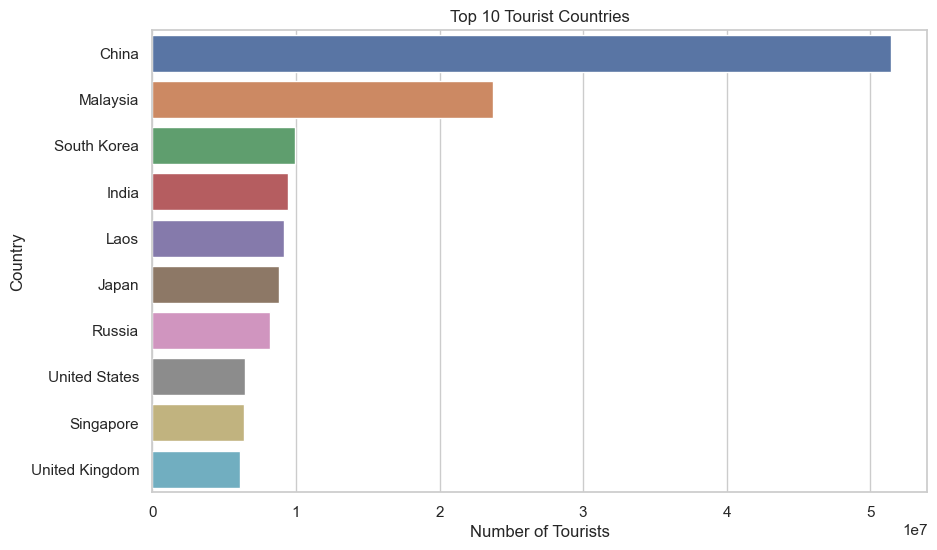

In [37]:
# Visualizing the top 10 Countries (since the list might be too long)
top_countries = tourists_by_country_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TouristNumber', y='CountryName_profile', data=top_countries)
plt.title('Top 10 Tourist Countries')
plt.xlabel('Number of Tourists')
plt.ylabel('Country')
plt.show()

<a id="relative-tourism-interest"></a>

## Relative Tourism Interest

In [27]:
# Ensure that the population is not zero to avoid division by zero errors
df_joined['Population'] = df_joined['Population'].replace(0, np.nan)
df_joined['TouristsPerCapita'] = df_joined['TouristNumber'] / df_joined['Population']

# Aggregate this new metric by country
relative_tourism_interest = df_joined.groupby('CountryName_profile')['TouristsPerCapita'].sum().reset_index()

# Sort the countries by the highest relative tourism interest
relative_tourism_interest_sorted = relative_tourism_interest.sort_values(by='TouristsPerCapita', ascending=False)

# Show the top 10 countries with the highest relative tourism interest
top_relative_tourism_interest = relative_tourism_interest_sorted.head(15)

top_relative_tourism_interest

,CountryName_profile,TouristsPerCapita
49,Coral Sea Islands,1.025125e+06
99,Indian Ocean Territories,1.717846e+03
18,Baykonur Cosmodrome,6.057830e+00
117,Laos,1.281154e+00
192,Singapore,1.114963e+00
129,Malaysia,7.433782e-01
95,Hong Kong S.A.R.,6.720534e-01
126,Macao S.A.R,3.164799e-01
37,Cambodia,2.850577e-01
169,Pitcairn Islands,2.592593e-01


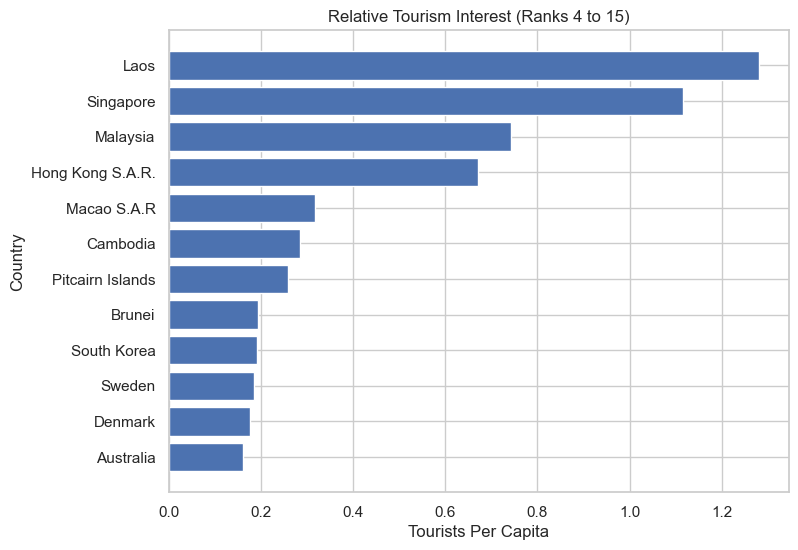

In [29]:
# Extracting ranks 4 to 15 for visualization
tourism_interest_4_to_15 = top_relative_tourism_interest.iloc[3:15]

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(tourism_interest_4_to_15['CountryName_profile'], tourism_interest_4_to_15['TouristsPerCapita'])
plt.xlabel('Tourists Per Capita')
plt.ylabel('Country')
plt.title('Relative Tourism Interest (Ranks 4 to 15)')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

- Laos: A neighboring country with a strong connection to Thailand, reflected in its high relative tourism interest.
- Singapore: Known for its travel-loving citizens, Singapore shows a high level of interest.
- Malaysia: Another neighbor with a keen interest in the Land of Smiles.
- Hong Kong S.A.R.: A major hub for travel and a significant source of tourists for Thailand.
- Macao S.A.R.: Similarly, a place where residents show a considerable interest in visiting Thailand.
- Cambodia: The cultural ties and proximity influence the tourism interest here.

Coral Sea Islands, Indian Ocean Territories, Baykonur Cosmodrome and Pitcairn Islands show very high ratio likely influenced by a very small population.

<a id="4-geographical-distribution-of-tourists"></a>

# 4. Geographical Distribution of Tourists

[Table of Contents](#table-of-contents)

In [38]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


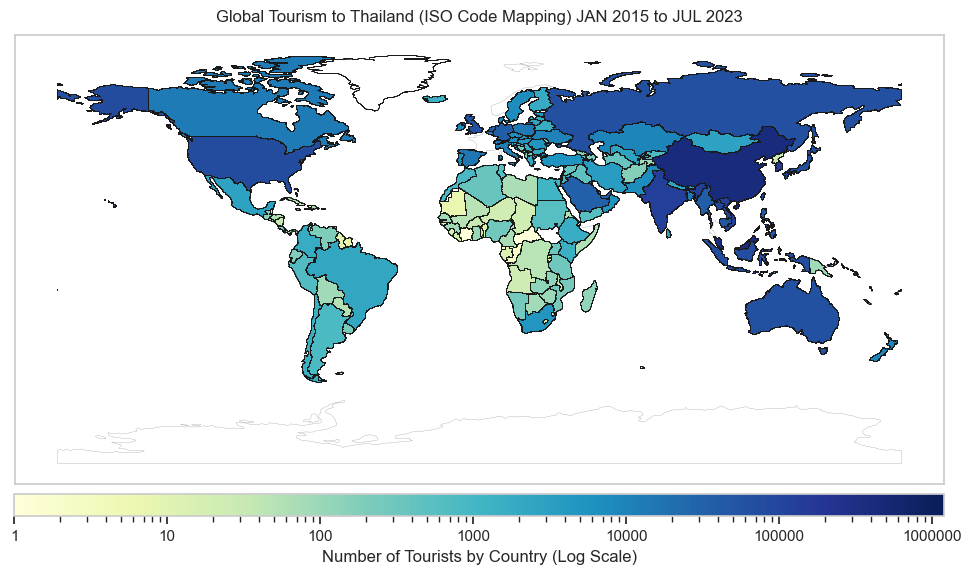

In [39]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Merge the tourism data with the world geometry using ISO codes
tourism_map_iso = world.merge(df, how="left", left_on="iso_a3", right_on="ISO")

# Adjust the figure size and plot with a logarithmic color scale
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)  # Reduced size for scale

tourism_map_iso.boundary.plot(ax=ax, linewidth=0.1, color='k')  # Reduced border line width
tourism_map_iso.plot(column='TouristNumber', ax=ax, legend=True,
                     legend_kwds={'label': "Number of Tourists by Country (Log Scale)",
                                  'orientation': "horizontal",
                                  'cax': cax,
                                  'format': "%.0f"},
                     cmap='YlGnBu',
                     edgecolor='k', linewidth=0.1,  # Reduced border line width
                     norm=colors.LogNorm(vmin=df['TouristNumber'].min(), vmax=df['TouristNumber'].max()))

# Remove grid and y-axis numbers
ax.grid(False)
ax.set_xticks([])  # Remove the x-axis numbers
ax.set_yticks([])  # Remove the y-axis numbers

# Move the title to the top of the plot
plt.title('Global Tourism to Thailand (ISO Code Mapping) JAN 2015 to JUL 2023', pad=340)

plt.show()

<a id="5-seasonal-traffic"></a>

# 5. Seasonal Traffic

[Table of Contents](#table-of-contents)

In [40]:
# Grouping the data by month and summing the tourist numbers
tourists_by_month = df_joined.groupby('MonthInfo')['TouristNumber'].sum().reset_index()

In [42]:
# Mapping months to seasons
season_map = {1: 'Cool', 2: 'Cool', 3: 'Hot', 4: 'Hot', 5: 'Rainy', 6: 'Rainy', 
              7: 'Rainy', 8: 'Rainy', 9: 'Rainy', 10: 'Rainy', 11: 'Cool', 12: 'Cool'}
df_joined['Season'] = df_joined['MonthInfo'].map(season_map)

# Grouping by season and summing the tourist numbers
tourists_by_season = df_joined.groupby('Season')['TouristNumber'].sum().reset_index()


<a id="number-of-tourists-by-month"></a>

## Number of Tourists by Month

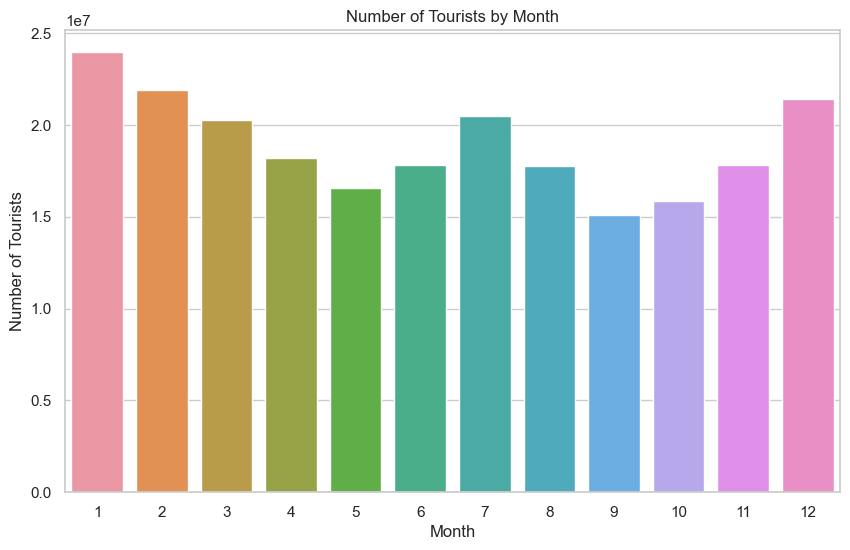

In [43]:
# Plotting the number of tourists by month
plt.figure(figsize=(10, 6))
sns.barplot(x='MonthInfo', y='TouristNumber', data=tourists_by_month)
plt.title('Number of Tourists by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tourists')
plt.show()

<a id="number-of-tourists-by-season"></a>

## Number of Tourists by Season

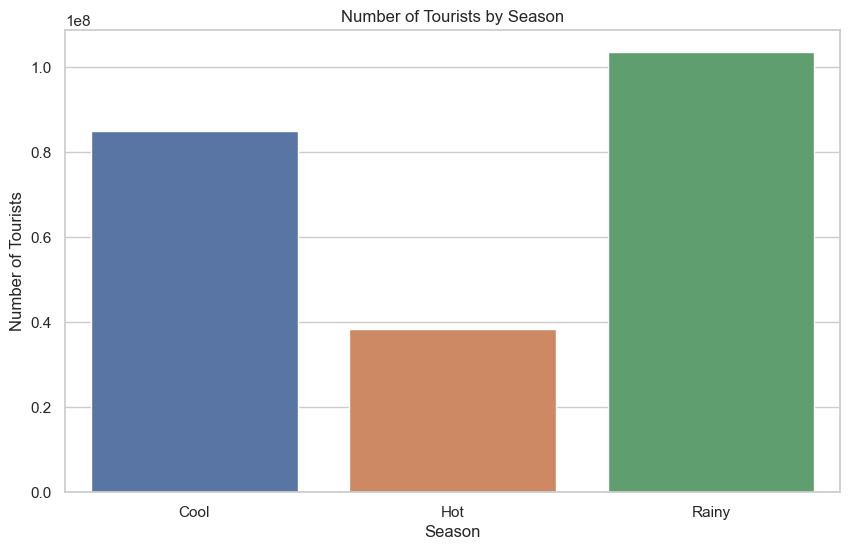

In [44]:
# Plotting the number of tourists by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='TouristNumber', data=tourists_by_season, order=['Cool', 'Hot', 'Rainy'])
plt.title('Number of Tourists by Season')
plt.xlabel('Season')
plt.ylabel('Number of Tourists')
plt.show()

<a id="6-tourist-spending"></a>

# 6. Tourist Spending

[Table of Contents](#table-of-contents)

In [45]:
# Grouping the data by region and summing the spending
spending_by_region = df_joined.groupby('Continent')['Receipt'].sum().reset_index()

<a id="spending-by-region"></a>

## Spending by Region

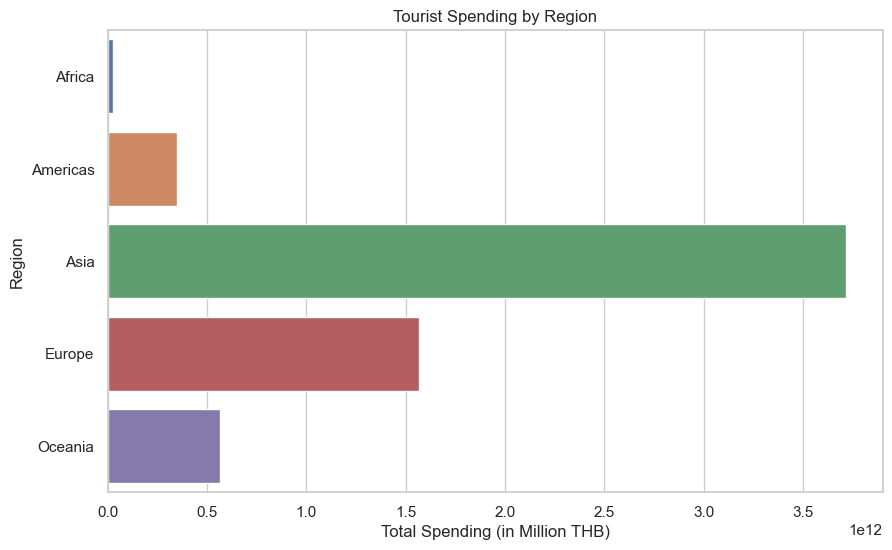

In [46]:
# Plotting the spending by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Receipt', y='Continent', data=spending_by_region)
plt.title('Tourist Spending by Region')
plt.xlabel('Total Spending (in Million THB)')
plt.ylabel('Region')
plt.show()

<a id="spending-by-subregion"></a>

## Spending by Subregion

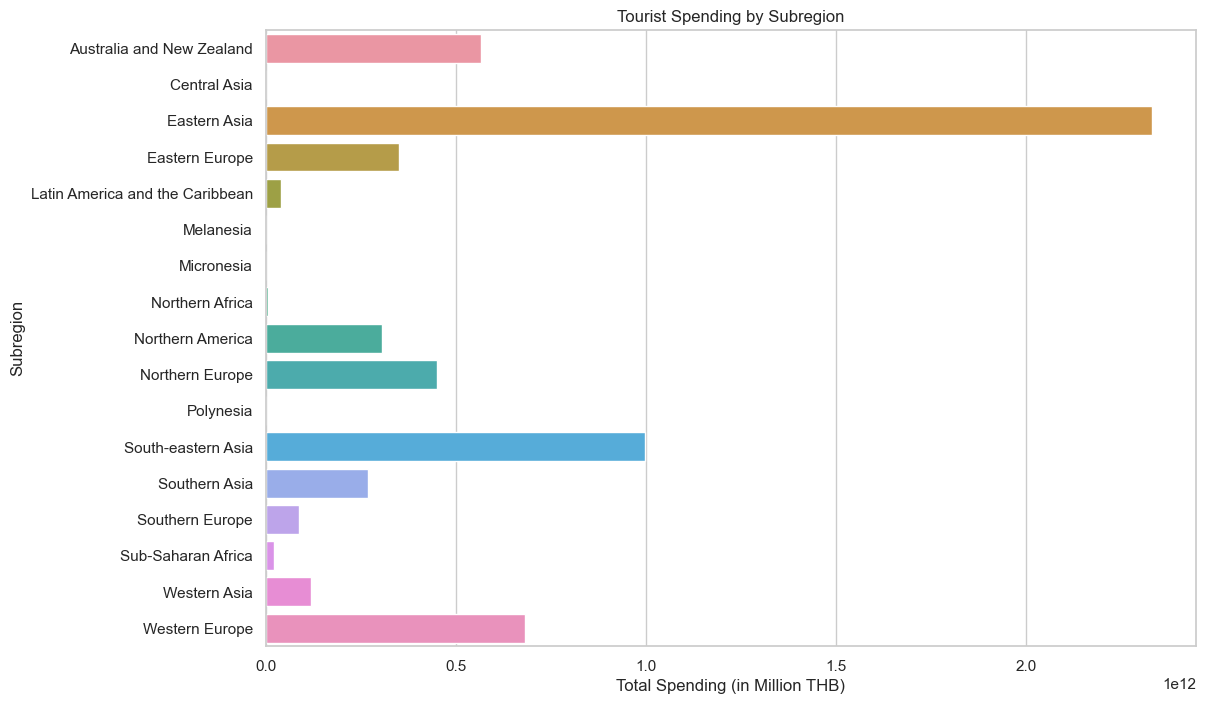

In [47]:
# Grouping the data by subregion and summing the spending
spending_by_subregion = df_joined.groupby('SubRegion')['Receipt'].sum().reset_index()

# Plotting the spending by subregion
plt.figure(figsize=(12, 8))
sns.barplot(x='Receipt', y='SubRegion', data=spending_by_subregion)
plt.title('Tourist Spending by Subregion')
plt.xlabel('Total Spending (in Million THB)')
plt.ylabel('Subregion')
plt.show()

<a id="spending-by-month-and-season"></a>

## Spending by Month & Season

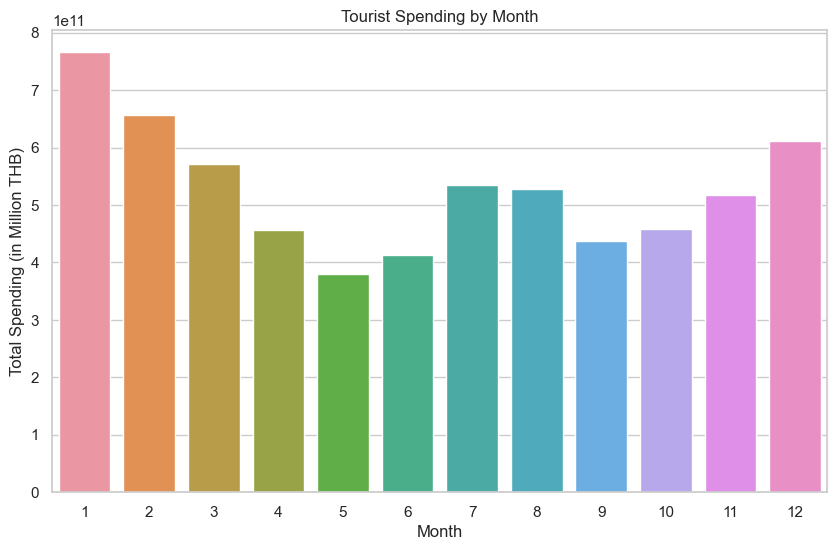

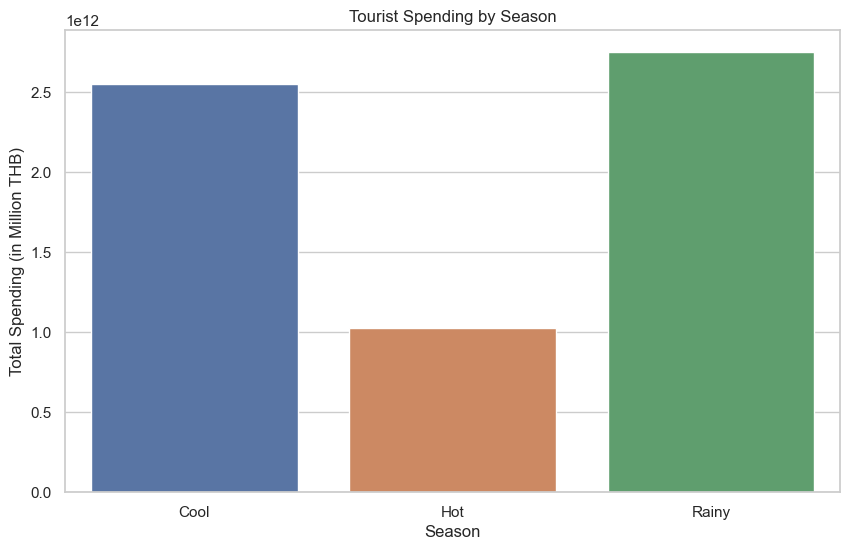

In [48]:
# Grouping the data by month and summing the spending
spending_by_month = df_joined.groupby('MonthInfo')['Receipt'].sum().reset_index()

# Plotting the spending by month
plt.figure(figsize=(10, 6))
sns.barplot(x='MonthInfo', y='Receipt', data=spending_by_month)
plt.title('Tourist Spending by Month')
plt.xlabel('Month')
plt.ylabel('Total Spending (in Million THB)')
plt.show()

# Grouping the data by season and summing the spending
spending_by_season = df_joined.groupby('Season')['Receipt'].sum().reset_index()

# Plotting the spending by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Receipt', data=spending_by_season, order=['Cool', 'Hot', 'Rainy'])
plt.title('Tourist Spending by Season')
plt.xlabel('Season')
plt.ylabel('Total Spending (in Million THB)')
plt.show()

<a id="7-tourist-profile"></a>

# 7. Tourist Profile

[Table of Contents](#table-of-contents)

<a id="spending-per-person-by-continent"></a>

## Spending per person by Continent

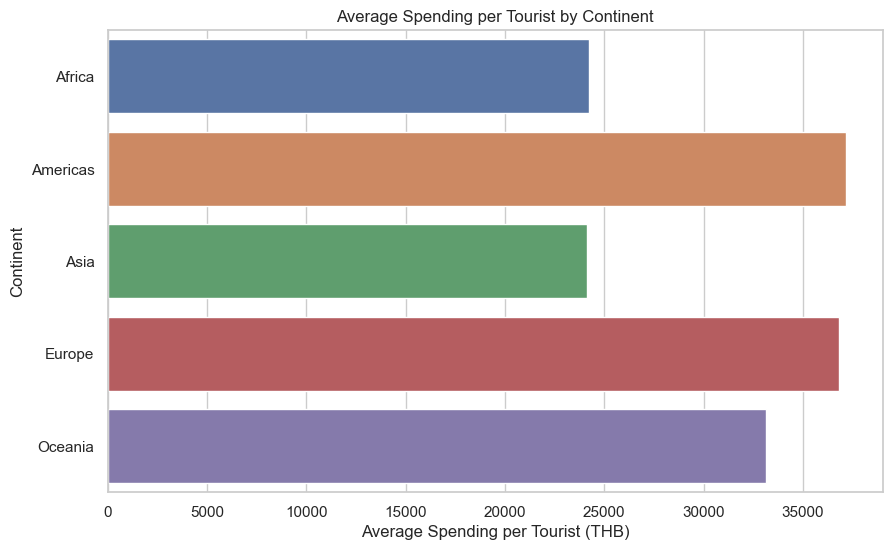

In [49]:
# Calculating total spending and total number of tourists by continent
continent_spending = df_joined.groupby('Continent').agg({'Receipt': 'sum', 'TouristNumber': 'sum'}).reset_index()
# Calculating average spending per tourist by continent
continent_spending['AvgSpendingPerTourist'] = continent_spending['Receipt'] / continent_spending['TouristNumber']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgSpendingPerTourist', y='Continent', data=continent_spending)
plt.title('Average Spending per Tourist by Continent')
plt.xlabel('Average Spending per Tourist (THB)')
plt.ylabel('Continent')
plt.show()

<a id="spending-per-person-by-subregion"></a>

## Spending per person by Subregion

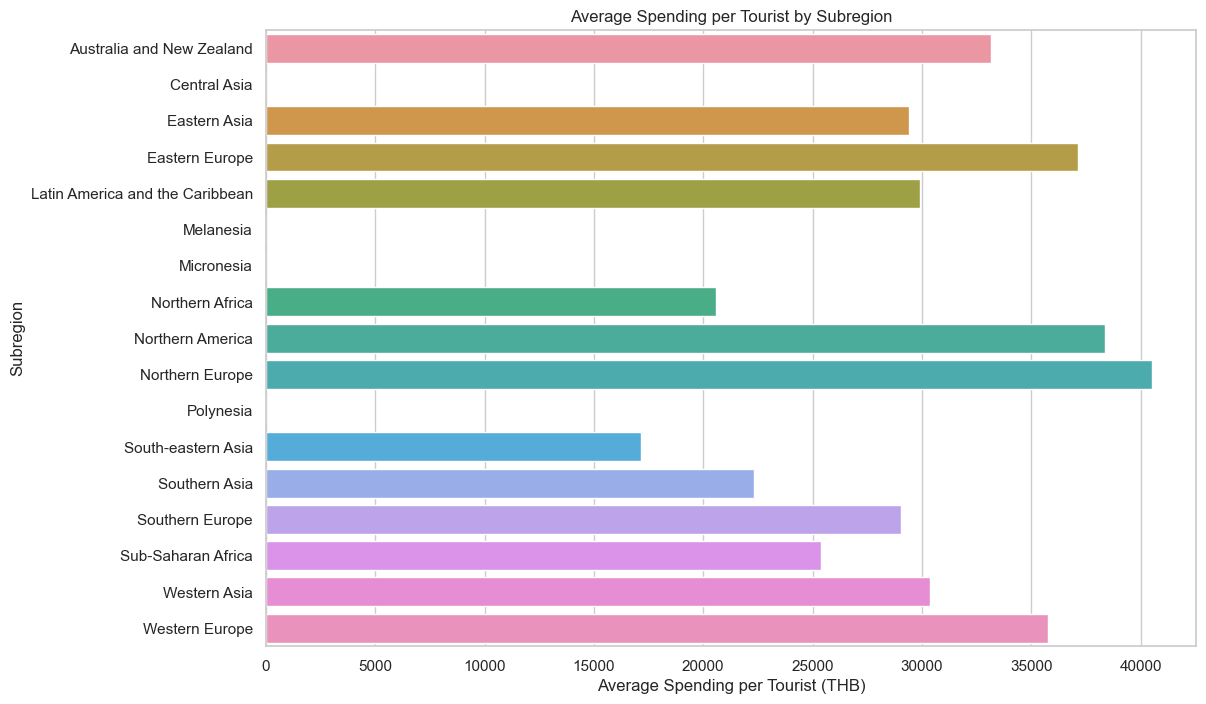

In [50]:
# Calculating total spending and total number of tourists by subregion
subregion_spending = df_joined.groupby('SubRegion').agg({'Receipt': 'sum', 'TouristNumber': 'sum'}).reset_index()
# Calculating average spending per tourist by subregion
subregion_spending['AvgSpendingPerTourist'] = subregion_spending['Receipt'] / subregion_spending['TouristNumber']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='AvgSpendingPerTourist', y='SubRegion', data=subregion_spending)
plt.title('Average Spending per Tourist by Subregion')
plt.xlabel('Average Spending per Tourist (THB)')
plt.ylabel('Subregion')
plt.show()

<a id="spending-per-person-by-country"></a>

## Spending per person by Country

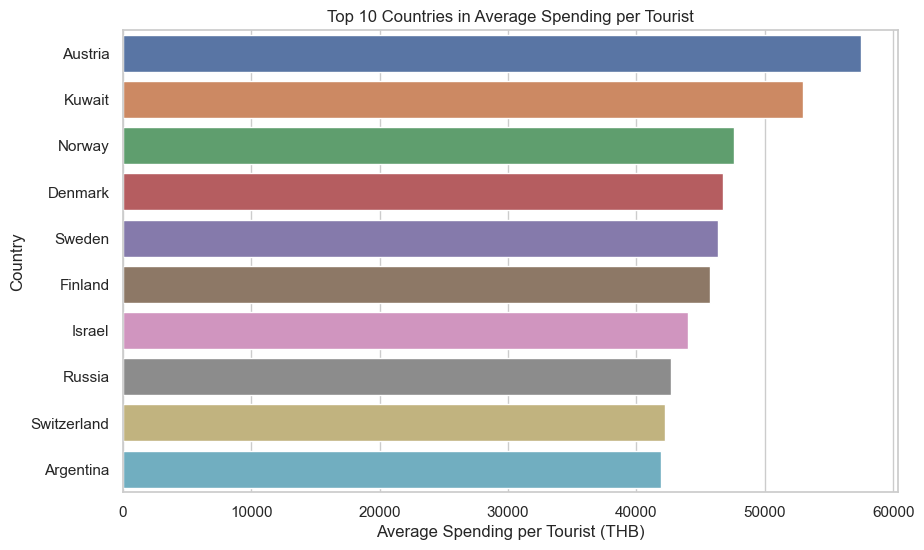

In [53]:
# Calculating total spending and total number of tourists by country
country_spending = df_joined.groupby('CountryName_profile').agg({'Receipt': 'sum', 'TouristNumber': 'sum'}).reset_index()
# Calculating average spending per tourist by country
country_spending['AvgSpendingPerTourist'] = country_spending['Receipt'] / country_spending['TouristNumber']

# Plotting the top 10 countries for clearer visualization
top_countries_spending = country_spending.sort_values(by='AvgSpendingPerTourist', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgSpendingPerTourist', y='CountryName_profile', data=top_countries_spending)
plt.title('Top 10 Countries in Average Spending per Tourist')
plt.xlabel('Average Spending per Tourist (THB)')
plt.ylabel('Country')
plt.show()

<a id="8-category-wise-spending-by-country"></a>

# 8. Category-wise Spending by Country

[Table of Contents](#table-of-contents)

## Accommodation
## Shopping
## Food
## Entertainment
## Local Transport

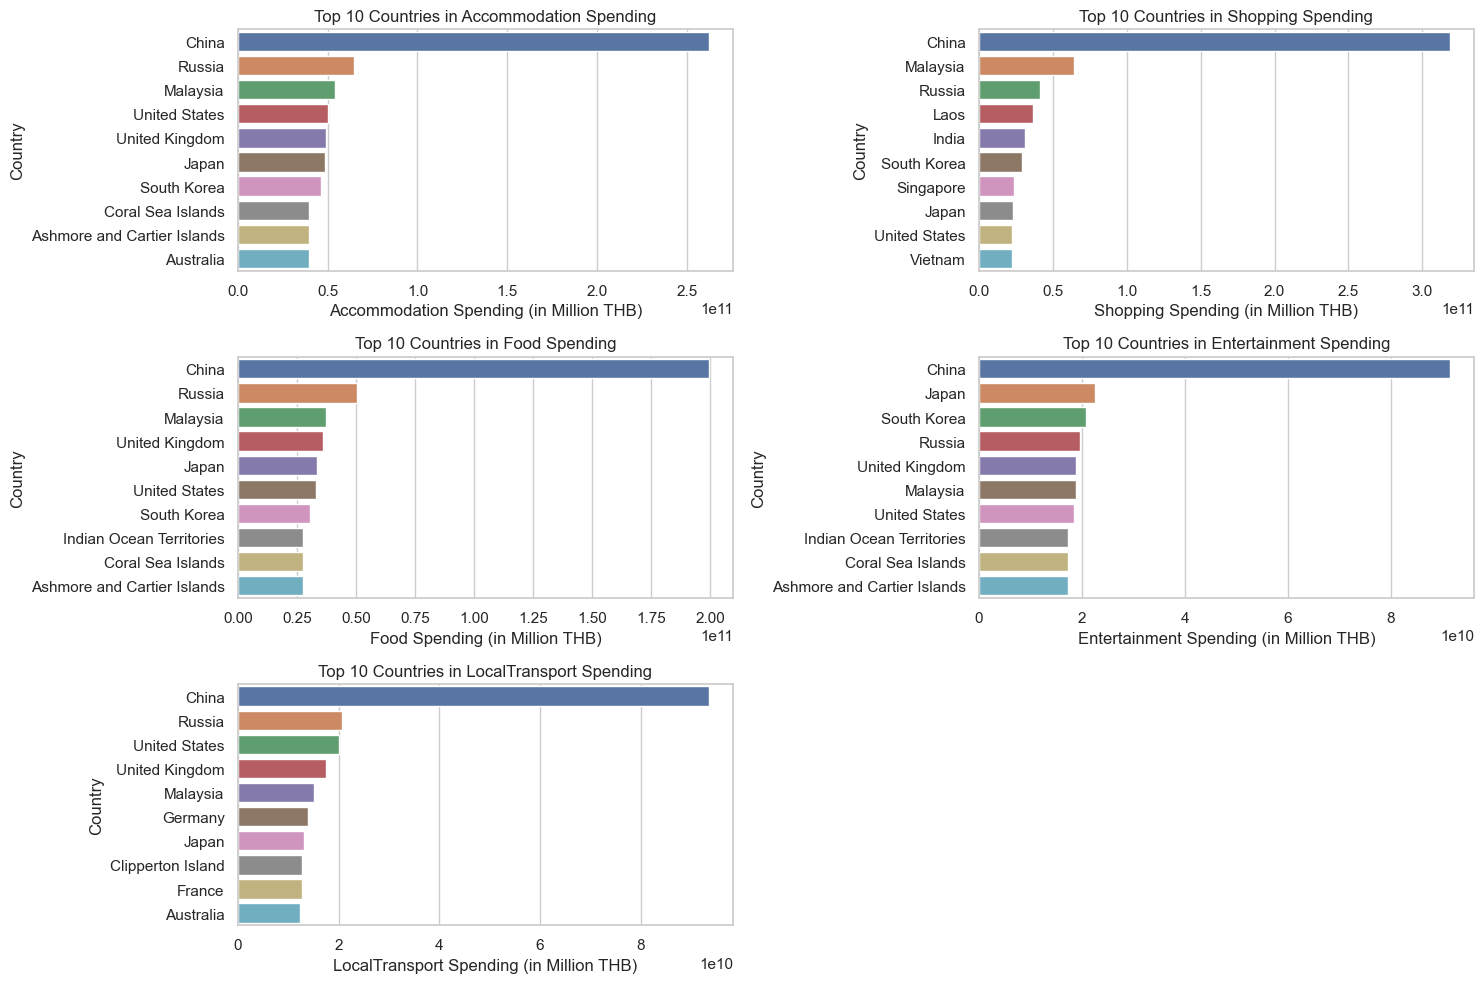

In [66]:
# Category-wise Spending by Country
# Calculating spending in various categories and aggregating by country

# List of spending categories
categories = ['Accommodation', 'Shopping', 'Food', 'Entertainment', 'LocalTransport']

# Creating a DataFrame to hold category-wise spending by country
category_spending_by_country = df_joined.groupby('CountryName_profile')[categories].sum().reset_index()

# Visualizing the data for each category separately for better clarity
# This will produce multiple plots, one for each spending category

plt.figure(figsize=(15, 10))

for i, category in enumerate(categories, 1):
    plt.subplot(3, 2, i)
    top_countries = category_spending_by_country.sort_values(by=category, ascending=False).head(10)
    sns.barplot(x=category, y='CountryName_profile', data=top_countries)
    plt.title(f'Top 10 Countries in {category} Spending')
    plt.xlabel(f'{category} Spending (in Million THB)')
    plt.ylabel('Country')

plt.tight_layout()
plt.show()

<a id="9-distribution-of-total-spending-per-category"></a>

# 9. Distribution of Total Spending per Category

[Table of Contents](#table-of-contents)

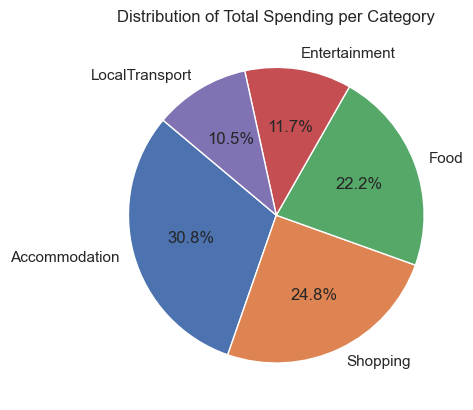

In [56]:
# Summing the total spending in each category
total_spending_category = df_joined[categories].sum()

# Plotting the distribution
total_spending_category.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Spending per Category')
plt.ylabel('')  # Hide the y-label
plt.show()

<a id="10-latest-year-2023"></a>

# 10. Latest Year (2023)

[Table of Contents](#table-of-contents)

In [57]:
# Filtering data for 2023
data_2023 = df_joined[df_joined['YearInfo'] == 2023]

# Aggregating spending data for 2023
spending_2023 = data_2023['Receipt'].sum()

# Displaying the total spending for 2023
print("Total Tourist Spending in 2023: ", spending_2023)

Total Tourist Spending in 2023:  0.0


No data available yet

## Category-wise Spending

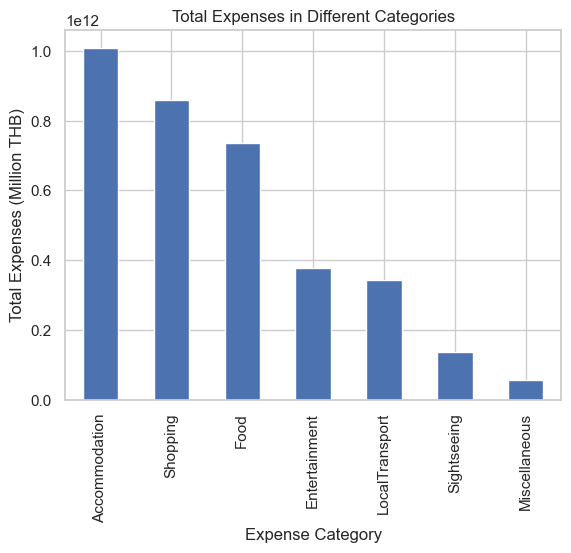

In [63]:
# Expenditure Analysis: Total expenses over the years
expense_categories = ['Shopping', 'Entertainment', 'Sightseeing', 'Accommodation', 'Food', 'LocalTransport', 'Miscellaneous']
total_expenses = df[expense_categories].sum().sort_values(ascending=False)

total_expenses.plot(kind='bar')
plt.title('Total Expenses in Different Categories')
plt.ylabel('Total Expenses (Million THB)')
plt.xlabel('Expense Category')
plt.show()

In [60]:
# Grouping data by country and calculating total receipts and total tourists
country_wise_receipts = df.groupby(['CountryName']).agg({'Receipt': 'sum', 'TouristNumber': 'sum'}).reset_index()

# Calculating expenses per person for each country (handling division by zero)
country_wise_receipts['ExpensesPerPerson'] = country_wise_receipts.apply(
    lambda row: row['Receipt'] / row['TouristNumber'] if row['TouristNumber'] > 0 else 0, axis=1)

# Sorting by ExpensesPerPerson to see the countries with the highest spending per person
sorted_expenses_per_person = country_wise_receipts.sort_values(by='ExpensesPerPerson', ascending=False)

# Displaying the top 10 countries by expenses per person
sorted_expenses_per_person.head(10)

,CountryName,Receipt,TouristNumber,ExpensesPerPerson
137,Kuwait,2.405125e+10,363883.0,66096.107815
13,Austria,8.100485e+10,1409560.0,57468.181560
186,Norway,3.786867e+10,795994.0,47574.064629
190,Others in Africa,8.492400e+09,179941.0,47195.469626
74,Denmark,4.822301e+10,1032139.0,46721.429962
246,Sweden,8.853490e+10,1909203.0,46372.701070
44,Canada,6.128166e+10,1338864.0,45771.385294
91,Finland,3.783182e+10,827872.0,45697.668239
125,Israel,5.202500e+10,1182754.0,43986.323445
212,Russian Federation,3.494595e+11,8186125.0,42689.245522


In [64]:
# Grouping data by country and calculating average spending per person for each expense category
country_expenses = df.groupby(['CountryName']).agg({**{category: 'sum' for category in expense_categories}, 'TouristNumber': 'sum'}).reset_index()

# Calculating expenses per person for each category
for category in expense_categories:
    country_expenses[f'{category}PerPerson'] = country_expenses.apply(
        lambda row: row[category] / row['TouristNumber'] if row['TouristNumber'] > 0 else 0, axis=1)

# Displaying the data for the top 10 countries by TouristNumber for illustration
top_countries_by_tourist_number = country_expenses.sort_values(by='TouristNumber', ascending=False).head(10)
top_countries_by_tourist_number[['CountryName', 'TouristNumber', *list(map(lambda x: x+'PerPerson', expense_categories))]]

,CountryName,TouristNumber,ShoppingPerPerson,EntertainmentPerPerson,SightseeingPerPerson,AccommodationPerPerson,FoodPerPerson,LocalTransportPerPerson,MiscellaneousPerPerson
53,China,51423061.0,6202.767859,1781.984157,1058.557560,5104.861027,3883.196296,1821.516031,364.390210
151,Malaysia,23750768.0,2709.550697,793.378555,246.451820,2271.281922,1578.343067,639.115754,136.728210
208,Republic of Korea,9958430.0,2938.240265,2084.728215,456.356072,4665.028524,3085.120847,1222.473824,283.987536
119,India,9428604.0,3306.532971,1571.207148,515.364735,3606.354663,2491.419727,1252.733703,249.427169
139,Lao People's Democratic Republic,9185176.0,3985.271485,1170.422864,148.868133,2544.223431,2051.192051,871.024137,81.617380
128,Japan,8841281.0,2619.551398,2553.898015,472.263013,5482.448754,3802.546260,1492.178566,237.321945
212,Russian Federation,8186125.0,5070.240193,2403.730703,904.282551,7899.284460,6183.423781,2527.364290,382.543633
270,United States of America,6424581.0,3492.884594,2888.130759,1168.603836,7777.271389,5151.562413,3142.106855,476.166461
232,Singapore,6359268.0,3757.526810,1289.120069,233.033110,3632.319003,2796.299826,944.899633,214.491668
266,United Kingdom of Great Britain and Northern I...,6093423.0,2906.254826,3107.253509,1076.442584,8092.584414,5887.419928,2873.803443,423.497597


In [65]:
# Extracting top 3 countries for each expense category
top_3_per_category = {}
for category in expense_categories:
    sorted_by_category = country_expenses.sort_values(by=f'{category}PerPerson', ascending=False)
    top_3_per_category[category] = sorted_by_category[['CountryName', f'{category}PerPerson']].head(3)

# Displaying the top 3 countries for each expense category
top_3_per_category

{'Shopping':               CountryName  ShoppingPerPerson
 137                Kuwait       11169.331901
 265  United Arab Emirates        8402.421572
 174                 Nepal        7951.992646,
 'Entertainment':               CountryName  EntertainmentPerPerson
 137                Kuwait             5858.036787
 265  United Arab Emirates             5063.602437
 12              Australia             4231.272828,
 'Sightseeing':    CountryName  SightseeingPerPerson
 8    Argentina           1426.052648
 44      Canada           1370.594773
 12   Australia           1288.626092,
 'Accommodation':     CountryName  AccommodationPerPerson
 137      Kuwait            12083.801662
 12    Australia             9648.691537
 246      Sweden             9556.060827,
 'Food':     CountryName  FoodPerPerson
 137      Kuwait    7906.469937
 246      Sweden    7346.966247
 91      Finland    7121.390746,
 'LocalTransport':     CountryName  LocalTransportPerPerson
 8     Argentina              4496

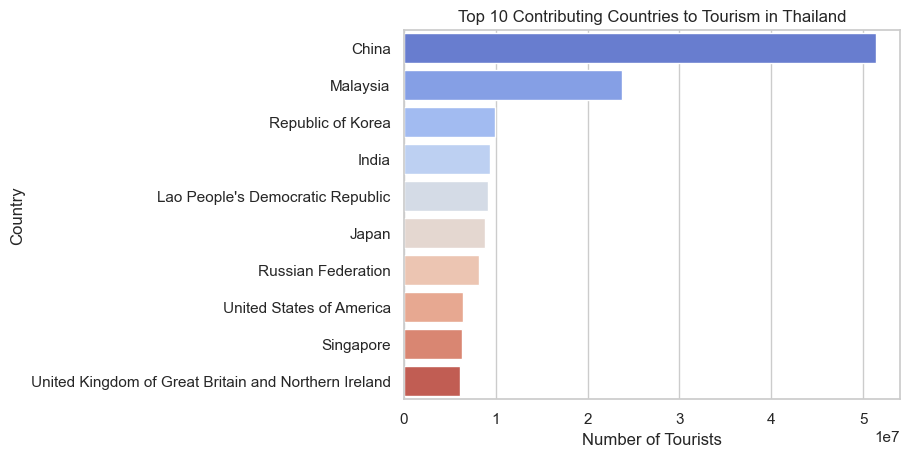

In [16]:
# Grouping data by country and summing up the number of tourists
country_wise_tourism = df.groupby(['CountryName']).agg({'TouristNumber': 'sum'}).reset_index()

# Sorting the data to find the top contributing countries
top_countries = country_wise_tourism.sort_values(by='TouristNumber', ascending=False).head(10)

# Plotting the top contributing countries
sns.barplot(data=top_countries, x='TouristNumber', y='CountryName', palette='coolwarm')
plt.title('Top 10 Contributing Countries to Tourism in Thailand')
plt.xlabel('Number of Tourists')
plt.ylabel('Country')
plt.show()

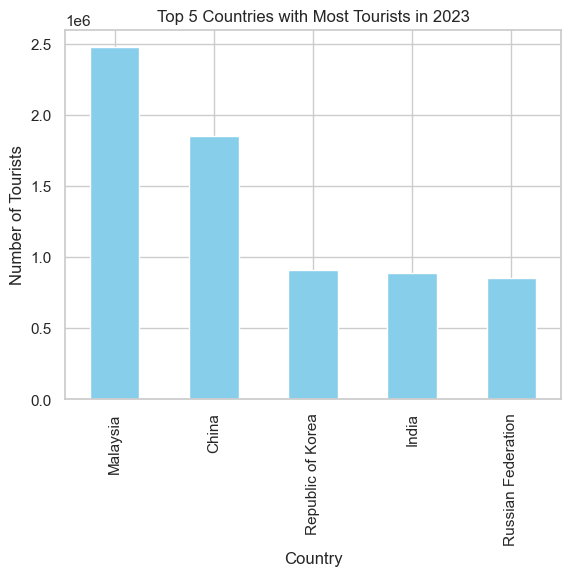

In [17]:
# Country-Specific Insights: Top 5 countries with the most tourists in the most recent year
latest_year = df['YearInfo'].max()
top_countries = df[df['YearInfo'] == latest_year].groupby('CountryName')['TouristNumber'].sum().sort_values(ascending=False).head(5)

top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top 5 Countries with Most Tourists in {latest_year}')
plt.ylabel('Number of Tourists')
plt.xlabel('Country')
plt.show()


## Geographical Distribution

<a id="11-conclusions"></a>

# 11. Conclusions

[Table of Contents](#table-of-contents)